Saving weather_data.csv to weather_data (2).csv
Columns in the DataFrame: ['Date', '       Temperature', ' Humidity', ' WindSpeed']
         Date  Temperature  Humidity  WindSpeed
0  2023-01-01           30        70         15
1  2023-01-02           32        65         10
2  2023-01-03           31        72         12
3  2023-01-04           29        75         18
4  2023-01-05           28        80         20


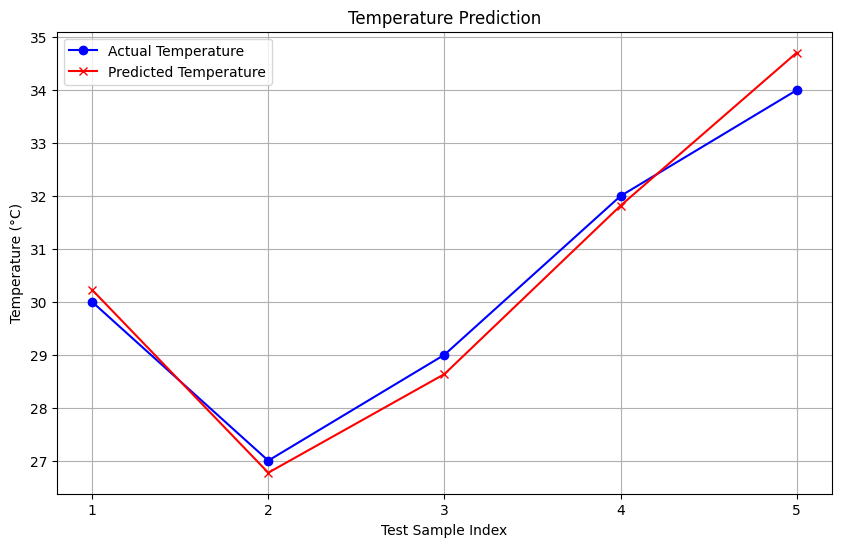

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files
uploaded=files.upload()

# importing data
df = pd.read_csv('weather_data.csv')

# Inspect the columns to check their names
print("Columns in the DataFrame:", df.columns.tolist())

# Clean column names to remove leading/trailing whitespace
df.columns = df.columns.str.strip()

# Display the first few rows of the DataFrame for verification
print(df.head())

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
# Extract 'Day' and 'Month' from the 'Date'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Selecting features and target
X = df[['Day', 'Month', 'Humidity', 'WindSpeed']]  # Features
y = df['Temperature']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Temperature', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Temperature', color='red', marker='x')
plt.title('Temperature Prediction')
plt.xlabel('Test Sample Index')
plt.ylabel('Temperature (°C)')
plt.xticks(np.arange(len(y_test)), np.arange(1, len(y_test) + 1))
plt.legend()
plt.grid()
plt.show()